# Evaluate the Test Predictions

In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/aaronquinton/Documents/UBC-MDS/Capstone/BCstats/DSCI_591_capstone-BCStats'

In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from src.models.evaluate_results import theme_results, plot_theme_ROC, plot_average_ROC_by_embed

In [3]:
df_test = pd.read_csv('./data/interim/test_2018-qualitative-data.csv')
Y_test = np.array(df_test.loc[:, "CPD":"OTH"])

In [4]:
Y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]])

In [5]:
with open('./data/output/test_predictions.pickle', 'rb') as handle:
          Y_pred = pickle.load(handle)

In [6]:
Y_pred

{'BOW': <100x12 sparse matrix of type '<class 'numpy.int64'>'
 	with 80 stored elements in Compressed Sparse Column format>,
 'ensemble': array([[0.25095317, 0.10677781, 0.06627721, ..., 0.0338367 , 0.1585702 ,
         0.02127943],
        [0.55333406, 0.1710918 , 0.02987165, ..., 0.01359393, 0.06707703,
         0.00768849],
        [0.01119903, 0.01482333, 0.02463441, ..., 0.9535798 , 0.04063011,
         0.00453783],
        ...,
        [0.05663476, 0.02932654, 0.07905816, ..., 0.0459852 , 0.2745806 ,
         0.01494379],
        [0.13723367, 0.08947726, 0.02371503, ..., 0.02821016, 0.06704804,
         0.00413662],
        [0.1025853 , 0.22347409, 0.07678962, ..., 0.1780979 , 0.09935841,
         0.01393691]], dtype=float32)}

## Bag of Words

In [7]:
Y_pred['BOW'].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [8]:
df_overall, df_theme = theme_results(Y_test,Y_pred['BOW'].toarray())

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
df_overall

,Metric,Value
0,Overall Accuracy,0.3800
1,Hamming Loss,0.0833
2,Micro-average Precision,0.7750
3,Micro-average Recall,0.4306


In [10]:
df_theme

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,12,8,0.04,8.000000e-02,0.96,1.000000,0.666667
1,CB,17,11,0.10,7.000000e-02,0.90,0.818182,0.529412
2,EWC,9,0,0.09,2.775558e-17,0.91,0.000000,0.000000
3,Exec,9,7,0.08,1.000000e-02,0.92,0.571429,0.444444
4,FWE,6,1,0.05,1.000000e-02,0.95,1.000000,0.166667
5,SP,6,6,0.10,-4.000000e-02,0.90,0.166667,0.166667
6,RE,4,0,0.04,-3.469447e-17,0.96,0.000000,0.000000
7,Sup,12,4,0.12,0.000000e+00,0.88,0.500000,0.166667
8,SW,29,16,0.19,1.000000e-01,0.81,0.812500,0.448276
9,TEPE,24,17,0.09,1.500000e-01,0.91,0.941176,0.666667


## Deep Learning Ensemble

In [11]:
df_overall, df_theme = theme_results(Y_test,np.round(Y_pred['ensemble']))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
df_overall

,Metric,Value
0,Overall Accuracy,0.3100
1,Hamming Loss,0.0900
2,Micro-average Precision,0.8600
3,Micro-average Recall,0.2986


In [13]:
df_theme

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,12,7,0.05,7.000000e-02,0.95,1.000000,0.583333
1,CB,17,3,0.14,3.000000e-02,0.86,1.000000,0.176471
2,EWC,9,0,0.09,2.775558e-17,0.91,0.000000,0.000000
3,Exec,9,9,0.08,1.000000e-02,0.92,0.555556,0.555556
4,FWE,6,0,0.06,-5.551115e-17,0.94,0.000000,0.000000
5,SP,6,0,0.06,-5.551115e-17,0.94,0.000000,0.000000
6,RE,4,0,0.04,-3.469447e-17,0.96,0.000000,0.000000
7,Sup,12,0,0.12,0.000000e+00,0.88,0.000000,0.000000
8,SW,29,8,0.23,6.000000e-02,0.77,0.875000,0.241379
9,TEPE,24,17,0.07,1.700000e-01,0.93,1.000000,0.708333


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


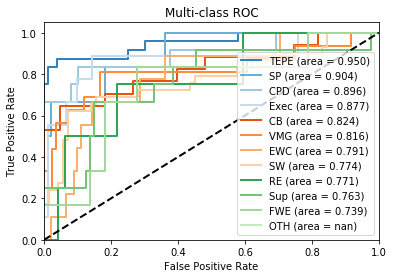

In [14]:
plot_theme_ROC(Y_test,Y_pred['ensemble'], save_fpath='./reports/figures/theme_ROC')

## Adjust the Probability Threshold

In [15]:
predictions = np.round(Y_pred['ensemble']-0.42)

a,b = theme_results(Y_test, predictions)
size = predictions.shape[0]
zero_size = (predictions[predictions.sum(axis = 1) == 0,:].shape[0])
print("Total comments:", size, 
      "\nTotal Predictions:", size - zero_size, 
      "\nPercent Pred non-zero:", round(1 - zero_size/size, 4))
a

Total comments: 100 
Total Predictions: 10 
Percent Pred non-zero: 0.1


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Metric,Value
0,Overall Accuracy,0.0900
1,Hamming Loss,0.1117
2,Micro-average Precision,1.0000
3,Micro-average Recall,0.0694


In [16]:
b

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,12,0,0.12,0.000000e+00,0.88,0.0,0.000000
1,CB,17,0,0.17,-2.775558e-17,0.83,0.0,0.000000
2,EWC,9,0,0.09,2.775558e-17,0.91,0.0,0.000000
3,Exec,9,0,0.09,2.775558e-17,0.91,0.0,0.000000
4,FWE,6,0,0.06,-5.551115e-17,0.94,0.0,0.000000
5,SP,6,0,0.06,-5.551115e-17,0.94,0.0,0.000000
6,RE,4,0,0.04,-3.469447e-17,0.96,0.0,0.000000
7,Sup,12,0,0.12,0.000000e+00,0.88,0.0,0.000000
8,SW,29,0,0.29,-5.551115e-17,0.71,0.0,0.000000
9,TEPE,24,10,0.14,1.000000e-01,0.86,1.0,0.416667


In [17]:
non_zero_pred = predictions[predictions.sum(axis = 1) != 0,:]
non_zero_valid = Y_test[predictions.sum(axis = 1) != 0,:]

a,b = theme_results(non_zero_valid, non_zero_pred)
a

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Metric,Value
0,Overall Accuracy,0.9000
1,Hamming Loss,0.0167
2,Micro-average Precision,1.0000
3,Micro-average Recall,0.8333


In [18]:
b

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,0,0,0.0,0.000000e+00,1.0,0.0,0.0
1,CB,0,0,0.0,0.000000e+00,1.0,0.0,0.0
2,EWC,0,0,0.0,0.000000e+00,1.0,0.0,0.0
3,Exec,0,0,0.0,0.000000e+00,1.0,0.0,0.0
4,FWE,0,0,0.0,0.000000e+00,1.0,0.0,0.0
5,SP,0,0,0.0,0.000000e+00,1.0,0.0,0.0
6,RE,0,0,0.0,0.000000e+00,1.0,0.0,0.0
7,Sup,1,0,0.1,2.775558e-17,0.9,0.0,0.0
8,SW,0,0,0.0,0.000000e+00,1.0,0.0,0.0
9,TEPE,10,10,0.0,1.000000e+00,1.0,1.0,1.0


In [28]:
#prob_threshold = np.arange(-0.45,0.45,0.01) 

prob_threshold = np.concatenate((np.arange(-0.499999,-0.49,0.0001),
                                 np.arange(-0.49,0.49,0.01),
                                 np.arange(0.49,0.49999,0.0001)))

In [26]:
accuracy = []
recall = []
precision = []
prob_adj = []
non_zero_percent = []

for i in prob_threshold:
    
    prob_adj.append(min((0.5 + i),1))
    predictions = np.round(Y_pred['ensemble'] - i)
    
    size = predictions.shape[0]
    zero_size = (predictions[predictions.sum(axis = 1) == 0,:].shape[0])
    
    non_zero_pred = predictions[predictions.sum(axis = 1) != 0,:]
    non_zero_valid = Y_test[predictions.sum(axis = 1) != 0,:]
    
    a,b = theme_results(non_zero_valid, non_zero_pred)
    precision.append(a.Value[2])
    recall.append(a.Value[3])
    
    
    
    accuracy.append(metrics.accuracy_score(non_zero_valid, non_zero_pred))
    non_zero_percent.append(round(1 - zero_size/size, 4))

results_tradeoff = pd.DataFrame({'prob_adj': prob_adj,
                                 'accuracy':accuracy,
                                 'precision': precision,
                                 'recall' : recall,
                                 'non_zero_percent':non_zero_percent})


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


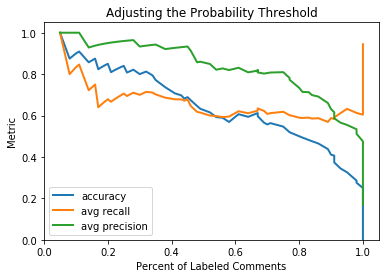

In [27]:
plt.figure()
colors = plt.get_cmap('tab10').colors

plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['accuracy'], 
         color=colors[0], lw=2,
         label='accuracy')
plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['recall'], 
         color=colors[1], lw=2,
         label='avg recall')
plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['precision'], 
         color=colors[2], lw=2,
         label='avg precision')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Percent of Labeled Comments')
plt.ylabel('Metric')
plt.title('Adjusting the Probability Threshold')
plt.legend(loc="lower left")
plt.savefig('./reports/figures/prob_threshold', dpi = 900)

plt.show()